In [18]:
from astroquery.mast import Catalogs
import matplotlib.pyplot as plt

# MAST Panstars Reference Queries

First, we're pulling Panstarrs observations using ``astroquery.mast`` for use as reference stars.

In [3]:
catalog_data = Catalogs.query_region("158.47924 -7.30962", radius=.2, #degree
                                      catalog="Panstarrs", data_release="dr1", table="mean")
print("Number of results:",len(catalog_data))
print(catalog_data)

Number of results: 28090
         objName           objAltName1 ... yFlags       distance      
-------------------------- ----------- ... ------ --------------------
PSO J103404.913-071907.817        -999 ...      0  0.04192282158820834
PSO J103404.669-071910.129        -999 ...      0  0.04108906415110339
PSO J103404.765-071912.126        -999 ...      0 0.041609844980402926
PSO J103404.709-071909.223        -999 ...      0  0.04119110883895829
PSO J103404.756-071908.320        -999 ... 115000 0.041301887812034026
PSO J103404.416-071911.365        -999 ...      0 0.040161660852649154
PSO J103404.489-071910.416        -999 ...      0  0.04038540074321651
PSO J103406.046-071941.685        -999 ...      0  0.04923859793266272
PSO J103406.003-071939.640        -999 ...      0 0.048844410882873814
PSO J103405.889-071939.968        -999 ...      0 0.048459509233645136
                       ...         ... ...    ...                  ...
PSO J103416.959-071859.171        -999 ...      0  0

In [19]:
# catalog_data.keys()

In [12]:
g = catalog_data['gMeanPSFMag']
g_npt = catalog_data['gMeanPSFMagNpt']
r = catalog_data['rMeanPSFMag']
i = catalog_data['iMeanPSFMag']
dist = catalog_data['distance']

Panstars are measuring grizy photometry.

In the case with little dust, main sequence star's BVR magntidues can be approximated as functions of grizy magntidues. This is dangerous, and only applies in specific case and even then, on average.


In [13]:
# https://arxiv.org/pdf/1706.06147.pdf - Table 2
B = g + 0.194 + 0.516 * (g-r)
V = g - 0.017 - 0.508 * (g-r)
R = r - 0.166 - 0.275 * (r-i)

Here we mask for only the brightest stars in r band ``(r<19)`` and stars which have been observed more than 2 times in g band ``(g_npt>2)``.

In [14]:
mask = [(r<19)&(g_npt>2)]

Finally we plot the the remaining photometry (stars with the above conditions of brightness and data quality).

//anaconda/envs/py34/lib/python3.6/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
//anaconda/envs/py34/lib/python3.6/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


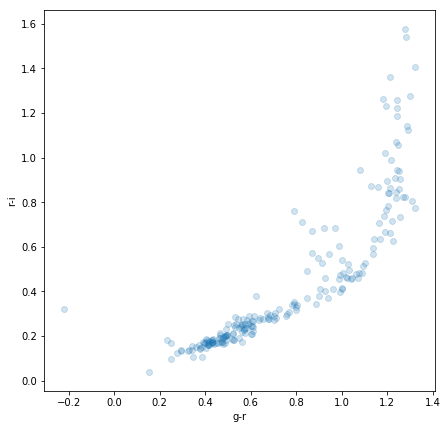

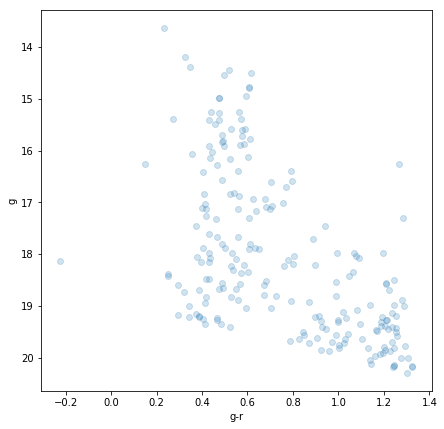

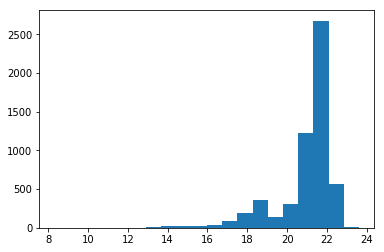

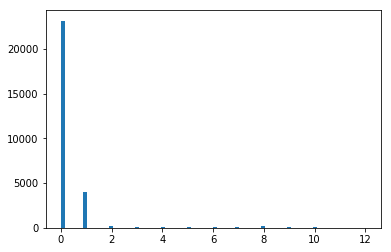

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(g[mask]-r[mask],r[mask]-i[mask], alpha=0.2)
plt.xlabel('g-r')
plt.ylabel('r-i');
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(g[mask]-r[mask],g[mask], alpha=0.2)
plt.xlabel('g-r')
plt.ylabel('g');
plt.ylim(plt.ylim()[::-1])
plt.show()

plt.hist(r, bins=20);
plt.show()

plt.hist(g_npt, bins=70);
plt.show()